<a href="https://colab.research.google.com/github/9645258/aiffel/blob/main/02_goingdeeper/01_nlp/%5BGD-10%5Dnlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. 데이터 준비**

### **1-1. 라이브러리 import**

In [ ]:
import re
import os
import io
import random
import tarfile
import numpy as np
import pandas as pd
import sentencepiece as spm

import tensorflow as tf

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import font_manager,rc

from tqdm.notebook import tqdm
from tqdm import tqdm_notebook

import warnings
warnings.filterwarnings(action='ignore')

### **1-2. 데이터 import**

- **국문 및 영문 데이터 import**

In [ ]:
data_dir = 'C:/Users/96452/00_work/01_GD/10/data'
kor_path = data_dir + '/korean-english-park.train.ko'
eng_path = data_dir + '/korean-english-park.train.en'

In [ ]:
with open(kor_path, "r", encoding = 'utf-8') as f:
    kor = f.read().splitlines()

In [ ]:
with open(eng_path, "r", encoding = 'utf-8') as f:
    eng = f.read().splitlines()

### **1-3. 데이터 확인**

- **데이터 수 확인**

In [ ]:
print('국문 데이터 수:', len(kor))
print('영문 데이터 수:', len(eng))

국문 데이터 수: 94123
영문 데이터 수: 94123


- **데이터 확인**

In [ ]:
print('<국문 데이터>\n', random.sample(kor, 15), '\n')
print('<영문 데이터>\n', random.sample(eng, 15))

<국문 데이터>
 ['헐슈호트 관장은 “기하급수적으로 많은 관람객이 모여들 것이며 교육과 학습을 위한 실제적 도구 역할을 다할 것”이라고 말했다.', '29일, 시라크 대통령은 이란과 이란의 핵 프로그램에 대해 "이란이 핵무기 1~2개를 보유한다고 해서 큰 위험이 되지는 않을 것이다"라고 밝혔다.', '우리나라는 1992년 이후 무궁화 1호를 시작으로 통신 위성 등 11차례 걸쳐 위성을 발사한 바 있다.', '거주지에 소아 관련 병을 가장 잘 치료하는 병원이 어디인지 찾아야 한다.', '도쿄 레스토랑은 보통 일품(一品) 요리로 손님을 접대한다.', '이 교리에 의거, 이에 관련 신도들의 즉각적인 파문조치가 시행될 예정이다.', '24시간 내에 열대성 폭풍 영향을 입게되는 열대성 폭풍 경보가 팔마솔라 남부 베라크루즈까지 내려졌다.', '공기가 희박하다.', '그의 귀가 되는 장치는 넓은 지역에 펼쳐져 있는 정교한 대형 전파망원경이다. 전파망원경은 외계기원의 신호를 위해 우주를 자세히 조사한다.', '이란에서 간첩 협의로 기소된 미국인 기자가 구속에 항의하며 단식 투쟁에 들어갔습니다.', '“두흐”로도 알려진 캉 케크 이우는 수도인 프놈 펜의 악명높은 S21 교도소의 책임자였다.', '고속범선은 여러 개의 돛대를 갖춘 배로 홍차나 모직물 같은 고가의 물품을 운반하는데 사용했다.', '토론회가 종료된 직후 CNN과 오피니언 리서치사가 실시한 여론조사에서 응답자 중 54%가 이번 토론회에서 오바마가 가장 잘 했다는 평가를 내렸고 공화당 대선후보인 존 매케인 상원의원이 더 잘했다는 응답은 30%에 불과했다.', '백신 첨가물 중 가장 논란이 많은 물질이며, 몇몇 사람들에 의해 자폐증을 일으키는 물질로 의심받고 있다.', '지난해 퓨 리서치, AP, AOL에서 여론조사를 실시한 결과 응답자의 81%는 공공장소에서 울리는 휴대폰 벨소리와 통화소리에 짜증을 느낀 적이 있다고 대답했다.'] 

<영문 데이터>
 ['The hunt for Neil began three year

### **1-4. 중복 데이터 제거**

- **중복 데이터 제거**  
zip으로 병렬 쌍을 고정하여 set로 중복 데이터 제거

In [ ]:
cleaned_corpus = set(zip(kor,eng))

- **중복 데이터 제거 후 데이터 수 확인**

In [ ]:
print("중복 데이터 제거 후 데이터 수:", len(cleaned_corpus))

중복 데이터 제거 후 데이터 수: 78968


- **중복 데이터 제거 후 데이터 확인**

In [ ]:
random.sample(cleaned_corpus, 10)

[('이에 10개 시민단체들은 서울 중심에 있는 정부청사에서 기자회견을 갖고 성범죄자의 사진과 정확한 주소를 포함하는 모든 정보를 공개할 것을 요구했다.',
  'Ten civic groups met the press at the government complex in central Seoul yesterday, demanding the release of full information, including photographs and exact addresses, of convicted sex offenders.'),
 ('공화당 대선주자인 존 매케인 상원의원은 27일(현지시간) 핵안보 정책에 대한 연설에서 미국이 상당수의 핵무기를 폐기할 필요성이 있다고 강조했다.',
  'The United States should scrap a significant portion of its nuclear arsenal, Sen. John McCain said Tuesday in a speech laying out his nuclear security policy.'),
 ('이 수치는 통계청이 2003년 데이터를 집계하기 시작한 이래 최고치이다.',
  'The figure was the highest since the office began compiling data in 2003.'),
 ("America's new objectives for the Afghanistan war to be announced next week 아프가니스탄 전쟁에 대한 미국의 새로운 목표 내주에 발표 예정\xa0 \xa0 \xa02009.06",
  '(Stewart)“ When you talk about the regulators, why not the Financial News Network?'),
 ('애틀란타에서 열린 1주일 벤처창업이 열린 것은 이번이 25회째로 지난해 1월 콜로라도주 보울더에서 열린 행사에서 이 같은 컵셉이 만들어졌다.',
  'The Atlanta event 

## **2. 데이터 정제**

### **2-1. 정제 함수 정의**

- **알파벳, 문장 부호, 한글 제외 전체 제거 및 영문 소문자화**  
- **문장 부호 양옆 공백 추가 및 문장 앞 뒤 공백 제거**  
- **숫자 데이터 삭제 시 학습 결과가 좋지 않으므로 숫자 데이터도 남기기로 결정**

In [ ]:
def preprocess_sentence(sentence):
    
    sentence = re.sub(r"^\s+|\s+$", "", sentence)
    sentence = re.sub(r"[^a-zA-Zㄱ-ㅎ0-9가-힣?.!,]+", " ", sentence)
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = sentence.strip()
    
    return sentence

- **SentencePeice를 활용한 데이터 토큰화 함수**

In [ ]:
def generate_tokenizer(corpus, vocab_size, lang = "ko", pad_id = 0, bos_id = 1, eos_id = 2, unk_id = 3):

    temp_file = data_dir + f'/korean-english-park-corpus-{lang}.txt'
    
    with open(temp_file, 'w', encoding = 'utf-8') as f:
        for row in corpus:
            f.write(str(row) + '\n')
    
    spm.SentencePieceTrainer.Train(
        f'--input={temp_file} --pad_id={pad_id} --bos_id={bos_id} --eos_id={eos_id} \
        --unk_id={unk_id} --model_prefix=spm_{lang} --vocab_size={vocab_size}'
    )
    tokenizer = spm.SentencePieceProcessor()
    tokenizer.Load(f'spm_{lang}.model')

    return tokenizer

### **2-2. 데이터 정제화**

In [ ]:
eng_corpus = []
kor_corpus = []

In [ ]:
for pair in cleaned_corpus:
    k, e = pair[0], pair[1]

    kor_corpus.append(preprocess_sentence(k))
    eng_corpus.append(preprocess_sentence(e))

### **2-3. 데이터 토큰화**

In [ ]:
ko_tokenizer = generate_tokenizer(kor_corpus, 30000, "ko")
en_tokenizer = generate_tokenizer(eng_corpus, 30000, "en")

### **2-4. 정제 진행 후 데이터 확인**

- **데이터 정보 확인**

In [ ]:
ko_tokenizer

<sentencepiece.SentencePieceProcessor; proxy of <Swig Object of type 'sentencepiece::SentencePieceProcessor *' at 0x00000224C04DF720> >

In [ ]:
en_tokenizer

<sentencepiece.SentencePieceProcessor; proxy of <Swig Object of type 'sentencepiece::SentencePieceProcessor *' at 0x00000224C04DFBA0> >

- **데이터 확인**

In [ ]:
print(kor_corpus[:4])

['정부가 새로운 인종간 긴장을 해결하는 데에 실패한 것에 대한 우려가 이번 사태의 주요 원인 중 하나로 믿어지고 있다 .', '당국은 체포된 블라고예비치 주지사와 해리스 비서실장이 각각 메일과 전화로 사기를 공동 모의하고 뇌물 수수를 요구한 혐의를 받고 있다고 밝혔다 .', '데이브는 자신의 아내가 우려를 하며 동정적이 될 거라고 생각한다 .', '오바마 후보 지지자들로부터 경선 사퇴 압박을 받고 있는 클린턴에 대해 오바마는 그녀가 경선을 완주하는 것이 바람직하다는 의견을 제시했다 .']


In [ ]:
print(eng_corpus[:4])

['Concern about a government failure to tackle renewed ethnic tension is believed to be one of the main reasons for the upset .', 'Each was charged with a count of conspiracy to commit mail and wire fraud and a count of solicitation of bribery , authorities said .', 'Dave figures his wife would be concerned and compassionate .', 'Clinton this weekend shot down calls by Obama backers to drop out of the race , and Obama said Clinton should remain in race as long as she wants .']


### **2-5. 단어사전 크기 재정의**

In [ ]:
SRC_VOCAB_SIZE = TGT_VOCAB_SIZE = 25000

ko_tokenizer = generate_tokenizer(kor_corpus, SRC_VOCAB_SIZE, "ko")
en_tokenizer = generate_tokenizer(eng_corpus, TGT_VOCAB_SIZE, "en")
en_tokenizer.set_encode_extra_options("bos:eos")

True

### **2-6. 데이터 선별**

- **토큰 길이 50이하의 데이터 선별**

In [ ]:
src_corpus = []
tgt_corpus = []

In [ ]:
assert len(kor_corpus) == len(eng_corpus)

In [ ]:
for idx in tqdm_notebook(range(len(kor_corpus))):
    src = ko_tokenizer.EncodeAsIds(kor_corpus[idx])
    tgt = en_tokenizer.EncodeAsIds(eng_corpus[idx])
    
    if len(src) <= 50 and len(tgt) <= 50:
        src_corpus.append(src)
        tgt_corpus.append(tgt)

  0%|          | 0/78968 [00:00<?, ?it/s]

### **2-7. 텐서 변환 처리**

In [ ]:
enc_train = tf.keras.preprocessing.sequence.pad_sequences(src_corpus, padding = 'post')
dec_train = tf.keras.preprocessing.sequence.pad_sequences(tgt_corpus, padding = 'post')

- **데이터 형태 확인**

In [ ]:
enc_train.shape

(70844, 50)

In [ ]:
dec_train.shape

(70844, 50)

- **데이터 확인**

In [ ]:
enc_train

array([[  304,   175,    91, ...,     0,     0,     0],
       [  216,     9,  2572, ...,     0,     0,     0],
       [10237,     6,   167, ...,     0,     0,     0],
       ...,
       [ 2410,    94,  1346, ...,     0,     0,     0],
       [  157,   922,   438, ...,     0,     0,     0],
       [21010,    14,    87, ...,     0,     0,     0]])

In [ ]:
dec_train

array([[   1, 7370,   59, ...,    0,    0,    0],
       [   1,  468, 3351, ...,    0,    0,    0],
       [   1, 6101, 1847, ...,    0,    0,    0],
       ...,
       [   1,  110,   11, ...,    2,    0,    0],
       [   1,  332,    4, ...,    0,    0,    0],
       [   1, 1625,   14, ...,    0,    0,    0]])

## **3. 모델 설계**

### **3-1. Positional Encoding**

In [ ]:
def positional_encoding(pos, d_model):
    def cal_angle(position, i):
        return position / np.power(10000, int(i)/d_model)
    
    def get_posi_angle_vec(position):
        return [cal_angle(position, i) for i in range(d_model)]
    
    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(pos)])
    
    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])
    
    return sinusoid_table

### **3-2. Multi Head Attention**

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
            
        self.depth = d_model // self.num_heads
            
        self.W_q = tf.keras.layers.Dense(d_model)
        self.W_k = tf.keras.layers.Dense(d_model)
        self.W_v = tf.keras.layers.Dense(d_model)
            
        self.linear = tf.keras.layers.Dense(d_model)

    def scaled_dot_product_attention(self, Q, K, V, mask):
        d_k = tf.cast(K.shape[-1], tf.float32)
        QK = tf.matmul(Q, K, transpose_b=  True)

        scaled_qk = QK / tf.math.sqrt(d_k)

        if mask is not None: scaled_qk += (mask * -1e9)  

        attentions = tf.nn.softmax(scaled_qk, axis = -1)
        out = tf.matmul(attentions, V)

        return out, attentions
            

    def split_heads(self, x):
        batch_size = x.shape[0]
        split_x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        split_x = tf.transpose(split_x, perm = [0, 2, 1, 3])

        return split_x

    def combine_heads(self, x):
        batch_size = x.shape[0]
        combined_x = tf.transpose(x, perm = [0, 2, 1, 3])
        combined_x = tf.reshape(combined_x, (batch_size, -1, self.d_model))

        return combined_x

        
    def call(self, Q, K, V, mask):
        WQ = self.W_q(Q)
        WK = self.W_k(K)
        WV = self.W_v(V)
        
        WQ_splits = self.split_heads(WQ)
        WK_splits = self.split_heads(WK)
        WV_splits = self.split_heads(WV)
            
        out, attention_weights = self.scaled_dot_product_attention(WQ_splits, WK_splits, WV_splits, mask)
        out = self.combine_heads(out)
        out = self.linear(out)
                
        return out, attention_weights

### **3-3. Position-wise Feed-Forward Network**

In [ ]:
class PoswiseFeedForwardNet(tf.keras.layers.Layer):
    def __init__(self, d_model, d_ff):
        super(PoswiseFeedForwardNet, self).__init__()
        self.w_1 = tf.keras.layers.Dense(d_ff, activation = 'relu')
        self.w_2 = tf.keras.layers.Dense(d_model)

    def call(self, x):
        out = self.w_1(x)
        out = self.w_2(out)
            
        return out

### **3-4. padding mask**

In [ ]:
def generate_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]

def generate_causality_mask(src_len, tgt_len):
    mask = 1 - np.cumsum(np.eye(src_len, tgt_len), 0)
    return tf.cast(mask, tf.float32)

def generate_masks(src, tgt):
    enc_mask = generate_padding_mask(src)
    dec_mask = generate_padding_mask(tgt)

    dec_enc_causality_mask = generate_causality_mask(tgt.shape[1], src.shape[1])
    dec_enc_mask = tf.maximum(enc_mask, dec_enc_causality_mask)

    dec_causality_mask = generate_causality_mask(tgt.shape[1], tgt.shape[1])
    dec_mask = tf.maximum(dec_mask, dec_causality_mask)

    return enc_mask, dec_enc_mask, dec_mask

### **3-5. Encoder Layer**

In [ ]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, n_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()

        self.enc_self_attn = MultiHeadAttention(d_model, n_heads)
        self.ffn = PoswiseFeedForwardNet(d_model, d_ff)

        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout = tf.keras.layers.Dropout(dropout)
        
    def call(self, x, mask):
        residual = x
        out = self.norm_1(x)
        out, enc_attn = self.enc_self_attn(out, out, out, mask)
        out = self.dropout(out)
        out += residual
        
        residual = out
        out = self.norm_2(out)
        out = self.ffn(out)
        out = self.dropout(out)
        out += residual
        
        return out, enc_attn

### **3-6. Decoder Layer**

In [ ]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(DecoderLayer, self).__init__()

        self.dec_self_attn = MultiHeadAttention(d_model, num_heads)
        self.enc_dec_attn = MultiHeadAttention(d_model, num_heads)

        self.ffn = PoswiseFeedForwardNet(d_model, d_ff)

        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout = tf.keras.layers.Dropout(dropout)
    
    def call(self, x, enc_out, causality_mask, padding_mask):
        residual = x
        out = self.norm_1(x)
        out, dec_attn = self.dec_self_attn(out, out, out, padding_mask)
        out = self.dropout(out)
        out += residual

        residual = out
        out = self.norm_2(out)
        out, dec_enc_attn = self.enc_dec_attn(out, enc_out, enc_out, causality_mask)
        out = self.dropout(out)
        out += residual
       
        residual = out
        out = self.norm_3(out)
        out = self.ffn(out)
        out = self.dropout(out)
        out += residual

        return out, dec_attn, dec_enc_attn

### **3-7. Encoder**

In [ ]:
class Encoder(tf.keras.Model):
    def __init__(self, n_layers, d_model, n_heads, d_ff, dropout):
        super(Encoder, self).__init__()
        self.n_layers = n_layers
        self.enc_layers = [EncoderLayer(d_model, n_heads, d_ff, dropout) 
                        for _ in range(n_layers)]
        
    def call(self, x, mask):
        out = x
    
        enc_attns = list()
        for i in range(self.n_layers):
            out, enc_attn = self.enc_layers[i](out, mask)
            enc_attns.append(enc_attn)
        
        return out, enc_attns

### **3-8. Decoder**

In [ ]:
class Decoder(tf.keras.Model):
    def __init__(self, n_layers, d_model, n_heads, d_ff, dropout):
        super(Decoder, self).__init__()
        self.n_layers = n_layers
        self.dec_layers = [DecoderLayer(d_model, n_heads, d_ff, dropout) for _ in range(n_layers)]
                                 
    def call(self, x, enc_out, causality_mask, padding_mask):
        out = x
    
        dec_attns = list()
        dec_enc_attns = list()
        for i in range(self.n_layers):
            out, dec_attn, dec_enc_attn = \
            self.dec_layers[i](out, enc_out, causality_mask, padding_mask)

            dec_attns.append(dec_attn)
            dec_enc_attns.append(dec_enc_attn)

        return out, dec_attns, dec_enc_attns

### **3-9. Transformer**

In [ ]:
class Transformer(tf.keras.Model):
    def __init__(self, n_layers, d_model, n_heads, d_ff, src_vocab_size, tgt_vocab_size, 
                 pos_len, dropout=0.2, shared=True):
        
        super(Transformer, self).__init__()
        self.d_model = tf.cast(d_model, tf.float32)

        self.enc_emb = tf.keras.layers.Embedding(src_vocab_size, d_model)
        self.dec_emb = tf.keras.layers.Embedding(tgt_vocab_size, d_model)

        self.pos_encoding = positional_encoding(pos_len, d_model)
        self.dropout = tf.keras.layers.Dropout(dropout)

        self.encoder = Encoder(n_layers, d_model, n_heads, d_ff, dropout)
        self.decoder = Decoder(n_layers, d_model, n_heads, d_ff, dropout)

        self.fc = tf.keras.layers.Dense(tgt_vocab_size)

        self.shared = shared

        if shared: self.fc.set_weights(tf.transpose(self.dec_emb.weights))

            
    def embedding(self, emb, x):
        seq_len = x.shape[1]
        out = emb(x)

        if self.shared: out *= tf.math.sqrt(self.d_model)

        out += self.pos_encoding[np.newaxis, ...][:, :seq_len, :]
        out = self.dropout(out)

        return out

        
    def call(self, enc_in, dec_in, enc_mask, causality_mask, dec_mask):
        enc_in = self.embedding(self.enc_emb, enc_in)
        dec_in = self.embedding(self.dec_emb, dec_in)

        enc_out, enc_attns = self.encoder(enc_in, enc_mask)
        
        dec_out, dec_attns, dec_enc_attns = \
        self.decoder(dec_in, enc_out, causality_mask, dec_mask)
        
        logits = self.fc(dec_out)
        
        return logits, enc_attns, dec_attns, dec_enc_attns

### **3-10. Optimizer**

- **Learning Rate Scheduler / Adam**

In [ ]:
class LearningRateScheduler(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps = 4000):
        super(LearningRateScheduler, self).__init__()
        self.d_model = d_model
        self.warmup_steps = warmup_steps
    
    def __call__(self, step):
        arg1 = step ** -0.5
        arg2 = step * (self.warmup_steps ** -1.5)
        
        return (self.d_model ** -0.5) * tf.math.minimum(arg1, arg2)

In [ ]:
learning_rate = LearningRateScheduler(512)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1 = 0.9, beta_2 = 0.98, epsilon = 1e-9)

### **3-11. Loss Function**

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True, reduction = 'none')

In [ ]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)
    
    mask = tf.cast(mask, dtype = loss_.dtype)
    loss_ *= mask
    
    return tf.reduce_sum(loss_) / tf.reduce_sum(mask)    

### **3-12. Train Step Function**

In [ ]:
@tf.function()
def train_step(src, tgt, model, optimizer):
    gold = tgt[:, 1:]
        
    enc_mask, dec_enc_mask, dec_mask = generate_masks(src, tgt)

    with tf.GradientTape() as tape:
        predictions, enc_attns, dec_attns, dec_enc_attns = \
        model(src, tgt, enc_mask, dec_enc_mask, dec_mask)
        loss = loss_function(gold, predictions[:, :-1])

    gradients = tape.gradient(loss, model.trainable_variables)    
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    return loss, enc_attns, dec_attns, dec_enc_attns

## **4. 학습 과정 출력 설계**

### **4-1. Attention 시각화**

In [ ]:
def visualize_attention(src, tgt, enc_attns, dec_attns, dec_enc_attns):
    def draw(data, ax, x = "auto", y = "auto"):
        sns.heatmap(data, square = True, vmin = 0.0, vmax = 1.0, cbar = False, ax = ax, xticklabels = x, yticklabels = y)
        
    for layer in range(0, 2, 1):
        fig, axs = plt.subplots(1, 4, figsize = (20, 10))
        print(f"<Self Attention {layer + 1}>")
        for h in range(4):
            draw(enc_attns[layer][0, h, :len(src), :len(src)], axs[h], src, src)
        plt.show()
        
    for layer in range(0, 2, 1):
        fig, axs = plt.subplots(1, 4, figsize = (20, 10))
        print(f"<Decoder Self Layer {layer + 1}>")
        for h in range(4):
            draw(dec_attns[layer][0, h, :len(tgt), :len(tgt)], axs[h], tgt, tgt)
        plt.show()

        print(f"<Context Vector By Decoder Input {layer + 1}>")
        fig, axs = plt.subplots(1, 4, figsize = (20, 10))
        for h in range(4):
            draw(dec_enc_attns[layer][0, h, :len(tgt), :len(src)], axs[h], src, tgt)
        plt.show()

### **4-2. 번역 진행**

In [ ]:
def evaluate(sentence, model, src_tokenizer, tgt_tokenizer):
    sentence = preprocess_sentence(sentence)
    pieces = src_tokenizer.encode_as_pieces(sentence)
    tokens = src_tokenizer.encode_as_ids(sentence)

    _input = tf.keras.preprocessing.sequence.pad_sequences([tokens], maxlen=enc_train.shape[-1], padding = 'post')
    
    print(len(_input))
    print(enc_train.shape[-1])

    ids = []
    output = tf.expand_dims([tgt_tokenizer.bos_id()], 0)
    
    for i in range(dec_train.shape[-1]):
        enc_padding_mask, combined_mask, dec_padding_mask = generate_masks(_input, output)
        predictions, enc_attns, dec_attns, dec_enc_attns = model(_input, output, enc_padding_mask, combined_mask, dec_padding_mask)
        predicted_id = tf.argmax(tf.math.softmax(predictions, axis=-1)[0, -1]).numpy().item()
        
        if tgt_tokenizer.eos_id() == predicted_id:
            result = tgt_tokenizer.decode_ids(ids)
            return pieces, result, enc_attns, dec_attns, dec_enc_attns

        ids.append(predicted_id)
        output = tf.concat([output, tf.expand_dims([predicted_id], 0)], axis=-1)
        
    result = tgt_tokenizer.decode_ids(ids)
    
    return pieces, result, enc_attns, dec_attns, dec_enc_attns

In [ ]:
def translate(sentence, model, src_tokenizer, tgt_tokenizer, plot_attention = False):
    pieces, result, enc_attns, dec_attns, dec_enc_attns = evaluate(sentence, model, src_tokenizer, tgt_tokenizer)
 
    print('국문:', sentence)
    print('번역을 수행한 영문:', result)

    if plot_attention:
        visualize_attention(pieces, result.split(), enc_attns, dec_attns, dec_enc_attns)

## **5. 학습 과정 출력 설계**

### **5-1. 모델 정의**

In [ ]:
transformer = Transformer(n_layers = 2, d_model = 512, n_heads = 8, d_ff = 2048, 
                          src_vocab_size = SRC_VOCAB_SIZE, tgt_vocab_size = TGT_VOCAB_SIZE,
                          pos_len = 200, dropout = 0.3, shared = True)

### **5-2. 학습 정의**

In [ ]:
BATCH_SIZE = 64
EPOCHS = 30

### **5-3. 예시 문장 정의**

In [ ]:
examples = ["오바마는 대통령이다.", "시민들은 도시 속에 산다.", "커피는 필요 없다.", "일곱 명의 사망자가 발생했다.", 
            "여름은 날씨가 덥다.", "그와 그녀는 결혼을 한다.", "영화관에서 영화를 보고 싶다.", "아이들은 학교에 간다.",
            "동물은 동물원에 있다.", "큰 문제가 발생하다."]

### **5-4. 최종 학습 및 학습 과정 출력 함수 정의**

In [ ]:
def fit(enc_train, dec_train, enc_tokenizer, dec_tokenizer):
    enc_maxlen, dec_maxlen = enc_train.shape[-1], dec_train.shape[-1]
    
    for epoch in range(EPOCHS):
        total_loss = 0

        idx_list = list(range(0, enc_train.shape[0], BATCH_SIZE))
        random.shuffle(idx_list)
        t = tqdm_notebook(idx_list)

        for (batch, idx) in enumerate(t):
            batch_loss, enc_attns, dec_attns, dec_enc_attns = \
            train_step(enc_train[idx:idx+BATCH_SIZE], dec_train[idx:idx+BATCH_SIZE], transformer, optimizer)

            total_loss += batch_loss

            t.set_description_str('Epoch %2d' % (epoch + 1))
            t.set_postfix_str('Loss %.3f' % (total_loss.numpy() / (batch + 1)))
        
        if (epoch + 1) % 1 == 0:
            print(f'<EPOCH {epoch + 1}>')
            for example in examples: 
                translate(example, transformer, ko_tokenizer, en_tokenizer, plot_attention = False)
            print(f'\n')
        
        if (epoch + 1) % 30 == 0:
            translate(example, transformer, ko_tokenizer, en_tokenizer, plot_attention = True)

### **5-5. 학습 진행 및 결과 확인**

- **숫자 미포함 데이터를 활용한 학습 진행**

  0%|          | 0/1120 [00:00<?, ?it/s]

<EPOCH 1>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: Obama s elected to the presidential presidential presidential candidate .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: They are a little in the area .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: They are not going to be able to be very very very very very very very very very very  ⁇ 
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: The blast was killed in a nearly nearly , a hospital , who was killed .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: They are expected to be a lot of the first time .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: He was a very good .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: They s films to the film .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: They are not to be a lot of the deaths .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: They can be a smaller .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: They are a lot of the U . S .




  0%|          | 0/1120 [00:00<?, ?it/s]

<EPOCH 2>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: Obama is not a president .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: The city is the city of city .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: There is no risk .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: On Tuesday , the death toll was killed .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: The weather is the weather .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: He was married to marriage .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The film has been the film .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: The children were being tortured .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: animals are animals .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: The Korea Times reports the government is not a new .




  0%|          | 0/1120 [00:00<?, ?it/s]

<EPOCH 3>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: It is a president .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: They are in the town of San Diego .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: coffee is not a coffee .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: The death toll was killed .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: The weather is the weather .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: He and her marriage , she said .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: They have long been held .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: kids are children .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: animal animals have been animals .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: The problem is the problem is the problem .




  0%|          | 0/1120 [00:00<?, ?it/s]

<EPOCH 4>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: The President is a president .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: The city s city is in the city .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: coffee in coffee
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: On Sunday , people died .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: This is a weather .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: He and her marriage .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The movie will be held by the theater s theaters .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: children are children .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: Animal rights animals are animals .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: The big problems in the big media .




  0%|          | 0/1120 [00:00<?, ?it/s]

<EPOCH 5>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: It is a president .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: citizens .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: She needs to be able to get a cup of de France .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Six soldiers were dead .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: This is a way of weather .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and her keeps her wedding
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: In theaters , it s a lot to know .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: children
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: Animals are located .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It is a big problem .




  0%|          | 0/1120 [00:00<?, ?it/s]

<EPOCH 6>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: Obama is the president .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: They are on the street .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: There is no immediate need for a night .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Six seven people died Sunday , she said .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: This summer rain is the summer and summer .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and she married her
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The film opens in theaters .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: The kids are crying , but kids .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: animals are located about animals .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: The big problems have been a problem .




  0%|          | 0/1120 [00:00<?, ?it/s]

<EPOCH 7>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: The President is a president .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: They are taking the mountain .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: coffee is nod for speaking conditions .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: The seven victims , who died Tuesday , were reported .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: This summer weather is a pretty cool summer .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: He and she married in a state .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: I want to play some kind of movie theater .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: He s kids in schools .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: The animals are considered .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It is a big problem .




  0%|          | 0/1120 [00:00<?, ?it/s]

<EPOCH 8>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: The President is a Obama victory .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: citizens takers sometime in the street .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: coffee . supplies participation .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven of seven were dead , a year old girl injured Tuesday , said provincial lawmaker .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: summer is a place for a place .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and she married in .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: There are some to be some viewers in theaters .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: children
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: The animals are animals .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: A big problem is that a matter of problems worry about that .




  0%|          | 0/1120 [00:00<?, ?it/s]

<EPOCH 9>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: President Obama is , and is a critical person .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: citizens .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: coffee there is no other holds coffee
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven seven people were dead , including seven persons , but more than dead person victim survived .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: This summer weather is the weather .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and she married in a wedding .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: You may not see if you can film .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: Here s children
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: The animal is animals .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: At one point on the problem .




  0%|          | 0/1120 [00:00<?, ?it/s]

<EPOCH 10>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: The Oval Office is a Obama family .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: The city s food city will only become the only one visiting .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: coffee makes coffee .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven people were killed , , of them injuries .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: summer is a place that s weather is a summer .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: she and her married
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: There may be some words .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: child
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: The animal is considered a zoo on .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: At a big problem , he takes a big problem .




  0%|          | 0/1120 [00:00<?, ?it/s]

<EPOCH 11>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: The President s Obama is .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: The city s long time can all to .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: coffee speaking coffee .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven people were killed Tuesday , said the government s connection kicks .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: This summer weather is a place that does not lights .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: she and she married .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: I wanted to play on And in films .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: boy she says she s spending six children with Detroit .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: The animals are considered .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: At a big problem , we are not a problem .




  0%|          | 0/1120 [00:00<?, ?it/s]

<EPOCH 12>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: The president is going to .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: This is the wealthy to the San Diego  ⁇ ui surrounding the San Diego  ⁇ uiulu .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: coffee is no otheroff .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven of the dead were wounded .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: summer is pretty much higher .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: she and her married in another
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: I would like to talk about filming .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: children
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: animals are considered .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It is a big problem .




  0%|          | 0/1120 [00:00<?, ?it/s]

<EPOCH 13>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: The President is tall central President .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: For the land is half of the city s long .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: coffee . aren t  marched .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: In put everything from seven deaths .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: This summer s weather is a weather good summer .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She married a marriage to a family
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: There may be few words , he wrote .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: kids are she said to school .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: The animals are considered .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It s not big signs .




  0%|          | 0/1120 [00:00<?, ?it/s]

<EPOCH 14>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: The President is a Obama all .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: They re running the overseas .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: coffee . doesn t speak for allegedly coffee .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven of seven people were killed .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: This summer is a weatherern Pay spokeswoman .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and she married on a question .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: There may be even if you have theaters .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: boys are children
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: The animals are animals .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: Fears that Korea s By problem has attracted a big problems .




  0%|          | 0/1120 [00:00<?, ?it/s]

<EPOCH 15>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: The President is a Obama present .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: For the rest of the country is getting about urban .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: coffee . aren t drinking .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven soldiers were killed , said Monday .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: This summer weather is a weather for dry condition .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and she married in a wedding
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: By some theater , he might be starring in theaters .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: boys say they are driven in childhood .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: The animals are animals .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: D problem is required to be very big in problems .




  0%|          | 0/1120 [00:00<?, ?it/s]

<EPOCH 16>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: The President is , Obama is .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: They can just five months .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: coffee . does not makes it much more coffee .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven people were killed , said Monday .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: This summer .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: she and her married .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: I didn t want to see them .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: children United States
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: The animals are attracting a sign of animal .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: My big problems




  0%|          | 0/1120 [00:00<?, ?it/s]

<EPOCH 17>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: The President is the Obamas .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: The st cities will just apply .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: coffee .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven people were killed , she said Monday , marking ambush seven and six other deaths .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: This summer .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She married a girls time .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: There may be some viewers if you can realize the movie .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: kids are likely to may be Beijing wanted to school .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: The animals are animals .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It s not the problem I ve been a problem .




  0%|          | 0/1120 [00:00<?, ?it/s]

<EPOCH 18>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: The President is , Obama is .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: Some people are suspected of involvement in the s .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: coffee makes coffee accepts coffee .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven of the dead were Nepal reached Sunday , according to some with about , people .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: summer .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: she and everyone married to marry .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: There may be some fellow he starring David as Change TV .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: The children are gone to school .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: animals are zoos .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: big problems were made available .




  0%|          | 0/1120 [00:00<?, ?it/s]

<EPOCH 19>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: The President is going to be president .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: They can just five months .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: coffee .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven of the victims were Nepal reached Sunday , .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: This summer s weather is a summer .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and her marriedie .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: There may be some words .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: The boy says he drives the children .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: The animals are wearing a zoo .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It s not just a sign of the problem .




  0%|          | 0/1120 [00:00<?, ?it/s]

<EPOCH 20>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: The President is , Obama is a black president .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: The city s urban rise is onto the rise .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: coffee there is no coffee .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven people were dead Tuesday , a toll toll media tollhind .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: The summer weather is in weather .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and she married in a Senate crew
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: There may be some words .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: children
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: The animals are zoos .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: Fears that too largely will also be a big problem .




  0%|          | 0/1120 [00:00<?, ?it/s]

<EPOCH 21>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: The President is the Obama family .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: Some citizens can rise in food prices .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: coffee makes coffee .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven people were killed , Li said .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: The weather is lost for weather .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and her marriage
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: There may be some fellow after  ⁇ 
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: children are divided over school .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: The animals are zoo , but the zoo is looking for animals .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It s not a problem here .




  0%|          | 0/1120 [00:00<?, ?it/s]

<EPOCH 22>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: The President is in the Obama administration .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: They re just provinces to see bird flu .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: coffee .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven people were injured Wednesday , were killed .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: The weather is greater .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and she married people .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: There may be able to leap on .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: Her children are two sons in school , legal experts say .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: The animals are zoos .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It is rare for a problem .




  0%|          | 0/1120 [00:00<?, ?it/s]

<EPOCH 23>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: The President is a trail .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: They s battle will on the rise in sea ice .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: coffee .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Six seven people were killed .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: over weather .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: He had a marry .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: There may be some fellow Star immediate release .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: children are in schools .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: animals are zoos .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: Fears that Korea s problem is not a problem .




  0%|          | 0/1120 [00:00<?, ?it/s]

<EPOCH 24>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: President Obama is president .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: They can street through the city .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: coffee there s no other fuel .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven of the victims were fatal .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: This summer weather is a place that your weather is summer .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She married .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: You might have to start .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: He said while he wanted to school .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: The animal zoo is base .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It is a problem that is not a big problem , but a problem is not a problem problem here .




  0%|          | 0/1120 [00:00<?, ?it/s]

<EPOCH 25>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: The President is , Obama is .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: They ve decided the overseas will take every extra in the wealth .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: coffee there is no need for  ⁇ 
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven people were killed , and some said he was about killed .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: summer weather .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and she married in the state
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: There may be some talking about .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: children are likely to school .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: zoo animals are zoos .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It is a problem that will happen here .




  0%|          | 0/1120 [00:00<?, ?it/s]

<EPOCH 26>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: President Obama is a family .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: They called several people to go .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: coffee .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven seven people have died , she said .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: summer .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and she married .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: There may be some fellow available to Amy correctly .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: but we say we are tired to school .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: The animals are considered a zoo .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It s breaking problems .




  0%|          | 0/1120 [00:00<?, ?it/s]

<EPOCH 27>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: The President is a Obama term .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: The citizens are grew in the nd area .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: coffee there s no other known rescue when De coffee reachesus .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven seven people were killed .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: summer weather is great .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and her marriage
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: There may be some new movie  ⁇  shoes .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: children are she said to school .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: The animals are zoo , which remains zoos or zoos , is zoo zoo officials said .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It s not a problem .




  0%|          | 0/1120 [00:00<?, ?it/s]

<EPOCH 28>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: The President is bringing Obama to Obama , .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: Some citizens can rise in wealth through the city .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: coffee .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven people were dead , said media .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: summer weather .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and her marriage
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: There may be some words .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: By some school intend to school .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: The animals are visitors .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It s not that first worry is being a major problem solving .




  0%|          | 0/1120 [00:00<?, ?it/s]

<EPOCH 29>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: President Obama is in the president .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: The people will just apply the s go live to the mountain .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: coffee .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven people were dead , he said .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: summer weather .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: she and her marriage .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: If he wanted to start to play .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: Her children are all but said he
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: The animals are zoo .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It s  problems in the custody .




  0%|          | 0/1120 [00:00<?, ?it/s]

<EPOCH 30>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: The President is in plus years .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: The city is put to traffic .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: coffee .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven seven people were killed .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: summer weather .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and her marriage .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: There may be some words , he says .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: children
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: The animals are zoo .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It s amazing that .


1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It s amazing that .
<Self Attention 1>


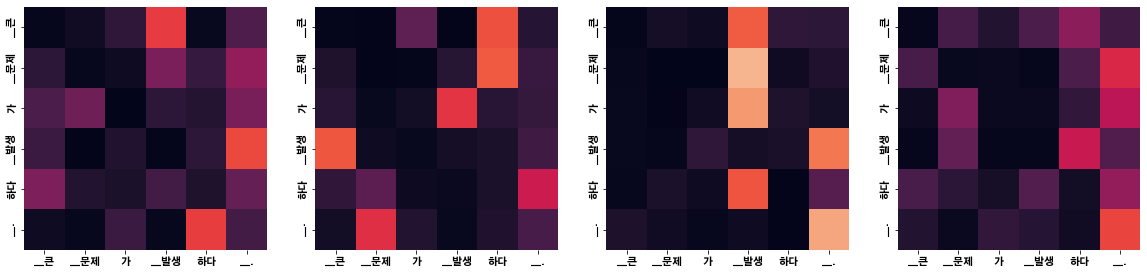

<Self Attention 2>


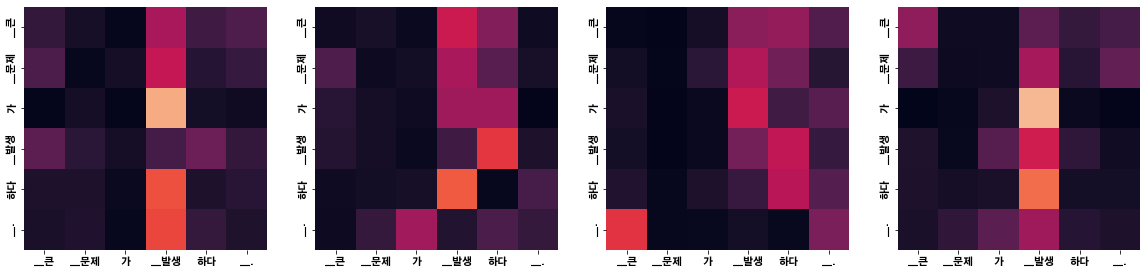

<Decoder Self Layer 1>


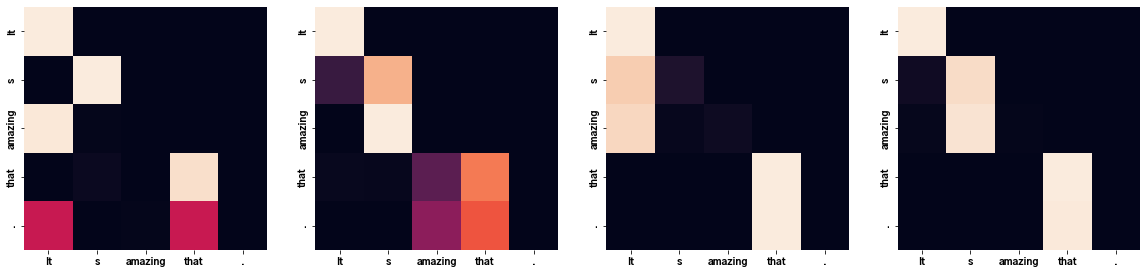

<Context Vector By Decoder Input 1>


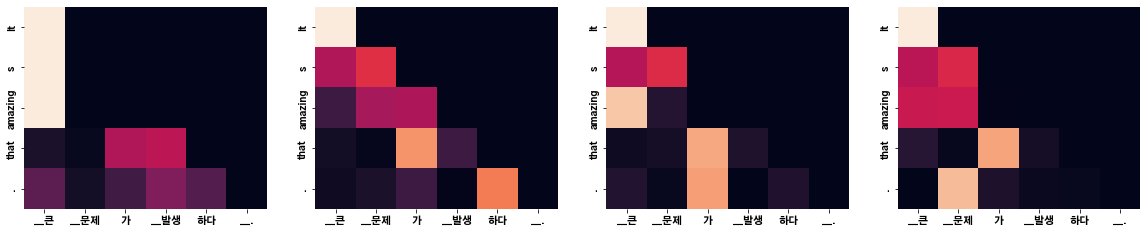

<Decoder Self Layer 2>


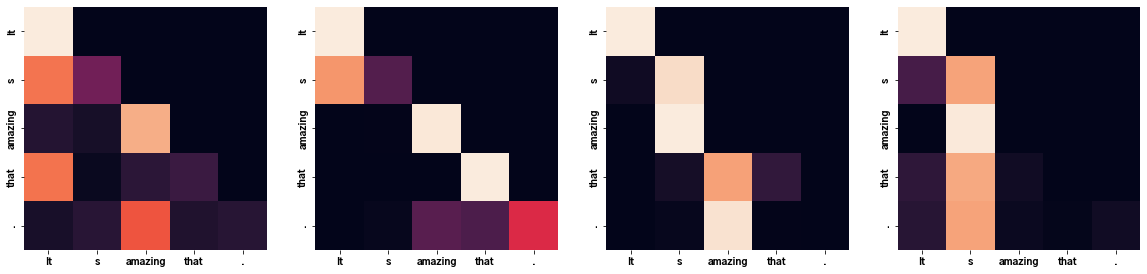

<Context Vector By Decoder Input 2>


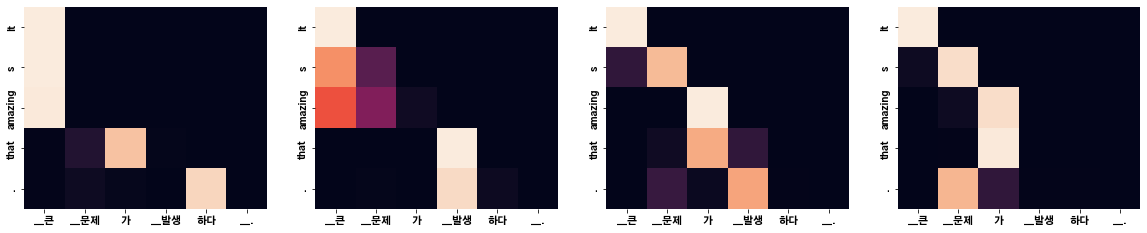

In [ ]:
fit(enc_train, dec_train, ko_tokenizer, en_tokenizer)

- **숫자 포함 데이터를 활용한 학습 진행**

  0%|          | 0/1107 [00:00<?, ?it/s]

<EPOCH 1>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: Obama is the first time .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: They are a new car .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: This is a lot of the new .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: They were killed in the town of the town .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: They are up to the Internet .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She has been a new .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The movie is a movie .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: They are not to be a .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: They are still to be a high .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: They are a lot of the country .




  0%|          | 0/1107 [00:00<?, ?it/s]

<EPOCH 2>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: Obama is the first time .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: The city solar system is a huge .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: The ideas are not going to because it is not going to because it s not yet .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: The death toll from the death toll from the death toll from the death toll .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: summer summer weather is the summer of summer .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She she must marry her marriage .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The film films are now in the film .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: The children were being given to the children .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: animals are being held in animals .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: The problem is not going to be a problem .




  0%|          | 0/1107 [00:00<?, ?it/s]

<EPOCH 3>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: Obama s president is a new president .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: The dust storms are scattered .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: If you need to be a very bad .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: The death toll was killed .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: summer summer weather is weather weather weather .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and she married she should be she .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The AP s Mark Smith is a big movie .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: children were children .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: Animals are  ⁇ oo .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: The problems are likely to be a problem .




  0%|          | 0/1107 [00:00<?, ?it/s]

<EPOCH 4>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: Obama is the President .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: The streets of the city s cities .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: coffee is necessary , he needed to do not allow them to do anything .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: The dead were killed in the seven deaths .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: There are hot weather conditions .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: He and his wife must be married .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The film theaters at the theater .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: The children are kids .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: zoos are zood .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: The problem is that there is a problem .




  0%|          | 0/1107 [00:00<?, ?it/s]

<EPOCH 5>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: Obama is the president .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: There are a growing city .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: Then there are no need .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven other seven people died .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: summer weather is cold .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and she should marry her .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The movie will be made at the top of the film .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: They are kids .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: habitats are being sold .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: A big problem is that the problem is a big problem .




  0%|          | 0/1107 [00:00<?, ?it/s]

<EPOCH 6>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: Obama is a President . . . . . . . . . . . . . . . . . . . . . .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: A city of city is a city .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: An coffee is a fairly good thing .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven of the seven people died .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: The weather is cold weather .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and her hat .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The film will play for the movie .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: They are headed to school .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: habitats are being zoo .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It is the fifth big problems .




  0%|          | 0/1107 [00:00<?, ?it/s]

<EPOCH 7>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: He is a president of Illinois .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: We have to be somewhere in the city .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: There is no need for a permanent UN .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: The seven Across the seven cases .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: The weather weather has rainy weather .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She She has been married to her marriage .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The film s movie set for theaters .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: They are schooling up .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: animals are zoo officials .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: A big problem is according to a report released .




  0%|          | 0/1107 [00:00<?, ?it/s]

<EPOCH 8>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: The president is a major stepoff .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: That is the city s going .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: There are no needs of coffee .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven crew members killed a personnel leaving .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: The weather was weather .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and she should marry .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The movie wants to see everything from movie .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: The children are able to get up .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: Animals are on animal .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: A big problem is communist .




  0%|          | 0/1107 [00:00<?, ?it/s]

<EPOCH 9>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: President Obama is a bigger than fiction .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: city is one of city citizens .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: There are no needs to drive .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: killed seven people in the seven days .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: Children are experiencing good weather .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and she should have married a guy .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The film opens with several movies .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: We are children .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: kept name zoos in zoo officials .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: A big problem is hugely caused by the question of the AP s Jason Bang there is an apparent bid .




  0%|          | 0/1107 [00:00<?, ?it/s]

<EPOCH 10>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: Obama is a man who s president .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: That is down to 90 .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: There s another fair .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven people were killed , the local official said .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: weathery weather and cold weather is good .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: she and her marriage .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The movie wants to come with the cinema .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: We are school kids .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: habitat are being zoo zoo officials zoo officials .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: A big problem is that a foreign language can have a giant woman sitting next .




  0%|          | 0/1107 [00:00<?, ?it/s]

<EPOCH 11>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: Obama is a place .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: San Every cities a mountain
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: need to be settleed on the chest .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven other people were killed .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: summer . . . . . .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She she married . . .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The film wants to see some of the films as some for theaters .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: The children are schooling .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: viruses are on the animals .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It is the first time a huge explosion .




  0%|          | 0/1107 [00:00<?, ?it/s]

<EPOCH 12>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: Obama is a place .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: Some city residents complain of a city .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: need nobody need to do the drinkers .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven other people were dead , including the seven death toll stories Wednesday .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: weather weather in weather and summer .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and she married .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The film s final sees .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: The children are school .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: The virus are on the zoo s list .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: A big problem is not a problem .




  0%|          | 0/1107 [00:00<?, ?it/s]

<EPOCH 13>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: Obama is a President .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: San Diego cities are excellent .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: There needs to drive the chest Golden Globes need to meet ET .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven other tasks were bloodless .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: summer weather is weather .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: she and her later .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The film s final report with theaters .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: The kids are schoold here , kids , but they are eager to get them to school .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: zoo contacts include the zoo s zoo safety .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: A bigger question issue is an appalling event .




  0%|          | 0/1107 [00:00<?, ?it/s]

<EPOCH 14>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: He is a President .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: That is the city .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: The needs of medicine , which tends to its once children .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven people were killed along the seven opinion polls .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: summer is hot weather .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and her later .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The film will gives the movies very few .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: We are school children .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: Animal contacts . .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It is the first time a foreign ministry issue .




  0%|          | 0/1107 [00:00<?, ?it/s]

<EPOCH 15>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: Obama is a place in the presidential election .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: We have cities down the city .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: The needs to drive the drinker .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven people were killed by the deaths .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: weather You weather patterns cold and weather cold
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and married she would have .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The big screen will see finally the final version of the movie .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: The children are school .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: The zoo is zoo officials zoo protection .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It is the first time a huge attack .




  0%|          | 0/1107 [00:00<?, ?it/s]

<EPOCH 16>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: Obama is a place in the presidential election
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: We are in the San Diego .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: There are no need .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven people were killed , the least uh fire wreck .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: summer . weather is always and hot .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She she married .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The film wants to play a big screen .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: The kids schools .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: Animal are on their zoo .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It s a big problem .




  0%|          | 0/1107 [00:00<?, ?it/s]

<EPOCH 17>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: Obama is a man president .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: big citys in neighboring .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: needs to do so .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven people were killed , the least Wednesday .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: summer weather weather in Gaza .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and she should be married .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The movie will be several votes at the cinema .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: They are schooling at age 20 .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: The zoo is usual at the zoo .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It s a big crisis .




  0%|          | 0/1107 [00:00<?, ?it/s]

<EPOCH 18>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: It is President Elect Barack Obama .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: Sanies Protested up .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: The needs to Colombian liv its ordinary consent .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven people were killed , the least several people said .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: In the summer weather , weathers and weather are .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She she married .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The movie will be on stage , stand .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: The children are school .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: viruses have been on animals .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It s been the first problem .




  0%|          | 0/1107 [00:00<?, ?it/s]

<EPOCH 19>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: Obama is President .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: San Diego cities are valued .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: The need no necessary .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven other seven people died .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: summer weather weather has the weather stopped .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She she married .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The movie , which wants to best viewers with final films , films .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: The children are schooling in school .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: zoo contacts have been blamed .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It appears that the story was the largest issue .




  0%|          | 0/1107 [00:00<?, ?it/s]

<EPOCH 20>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: Obama is President . Watch Obama s leading presidential trip
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: Some in the city of All rights .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: need to do so .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven people were killed and another seven were wounded .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: You weather in weather .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She she married .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The idea sees , it s several hit the final .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: The children are school .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: zoo officials are Wednesday .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It s coming toward a foreign national congress .




  0%|          | 0/1107 [00:00<?, ?it/s]

<EPOCH 21>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: Obama is a man who s president .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: ies in motor cities .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: delegation needs to be a short liv southeast .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven other people were killed .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: summer weather for weather .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She She becomes prime minister .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The movie , which I wanted to hits from a theater .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: The children are school .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: Animal are sometimes escaped .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It is the first time a huge number of protesters .




  0%|          | 0/1107 [00:00<?, ?it/s]

<EPOCH 22>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: President Obama has a place in the presidential election .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: Sanern Chinula also helped .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: holiday needs to be unveiled .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven other seven people were dead .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: weather weather weather Santa weather and weather Santa M .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She She married Barcelona as she would .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The movie wants to finally report from says .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: The children are from schoolchildren .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: Animal are sometimes zoo officials Wednesday .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It s coming out a big story




  0%|          | 0/1107 [00:00<?, ?it/s]

<EPOCH 23>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: Obama is a President . . . . .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: San Antonio A railways .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: There s no need for either drinkers .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven people were killed seven .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: weather weather weather Santa for weather .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and her marriage taken married .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The ideas for some viewers .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: The children are school teaching Ministry .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: The zoo is worth zoo offers for the zoo Now
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It is the first time a foreign participant at a problems .




  0%|          | 0/1107 [00:00<?, ?it/s]

<EPOCH 24>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: He President Obama is a President .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: San Francisco became the city .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: need to do its east during Christmas .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven people were killed , the least seven days before the seven death toll .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: summer weather weather weather and weather is always look .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and her married
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The final pitching for theaters .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: The children are schooling in the schools .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: zoo contacts are in the zoo .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It s coming a total of personal early .




  0%|          | 0/1107 [00:00<?, ?it/s]

<EPOCH 25>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: Obama is a President .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: San Francisco Oakland , New is a nice safety .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: need nobody needs .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven other seven deaths were forced to rise .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: summer weather weather weather weather .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and her wedding .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The movie wants to finally see finally at the cinema .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: The children are school teaching lodged in the house .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: zoo officials are on the zoo s list .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It is the first time a foreign survey .




  0%|          | 0/1107 [00:00<?, ?it/s]

<EPOCH 26>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: Obama is a place in the electoral procedure .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: Ouries are Yonhap news .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: He cannot need a fairly member .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven people were killed , the plane official said .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: summer .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She she married just in her wedding .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The latest gives the cinema , I hope to want to be see .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: We are schools in these houses , school boys .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: zoo officials are zoo contact .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It s the biggest problem that there is a problem .




  0%|          | 0/1107 [00:00<?, ?it/s]

<EPOCH 27>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: Obama is a President .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: Ouries are sorry .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: He cannot need to .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven people were killed , the led by the death toll .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: summer . weather weather weather and cold weather is just her .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and her marriage license
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The movie will be three star ideas .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: We are schools in intelligence .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: Animal zoo officials are zoo officials .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: Its overseas for up to the congressional committees are handling problems




  0%|          | 0/1107 [00:00<?, ?it/s]

<EPOCH 28>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: Obama on what is on the president .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: We are in the San Twental News .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: needs to be its tool , he said .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven other seven people were killed .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: You re even seeing weather and summer .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and her underwear .
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The latest movie will be playing in July .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: The children are her kids in school .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: zoos have been nationwide .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It s a big issue that has happened .




  0%|          | 0/1107 [00:00<?, ?it/s]

<EPOCH 29>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: Obama is a place .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: Among the city s lives
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: need to do well .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven P5N injured the fatality in the5 accident .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: Even weather weather .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and her wedding
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The movie wants to finally report with theater .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: The children are school .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: Animal zoos are at the zoo .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It s been the first time a huge attack .




  0%|          | 0/1107 [00:00<?, ?it/s]

<EPOCH 30>
1
50
국문: 오바마는 대통령이다.
번역을 수행한 영문: Obama is President elect .
1
50
국문: 시민들은 도시 속에 산다.
번역을 수행한 영문: Among the city s urban was a safety 22 .
1
50
국문: 커피는 필요 없다.
번역을 수행한 영문: He cannot need a permanent member .
1
50
국문: 일곱 명의 사망자가 발생했다.
번역을 수행한 영문: Seven people were killed or wounded .
1
50
국문: 여름은 날씨가 덥다.
번역을 수행한 영문: You can even see weather .
1
50
국문: 그와 그녀는 결혼을 한다.
번역을 수행한 영문: She and her marriage license
1
50
국문: 영화관에서 영화를 보고 싶다.
번역을 수행한 영문: The idea three new movie finally .
1
50
국문: 아이들은 학교에 간다.
번역을 수행한 영문: The children are school .
1
50
국문: 동물은 동물원에 있다.
번역을 수행한 영문: The zoo is pursuing a zoo .
1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It s been a huge political issue .


1
50
국문: 큰 문제가 발생하다.
번역을 수행한 영문: It s been a huge political issue .
<Self Attention 1>


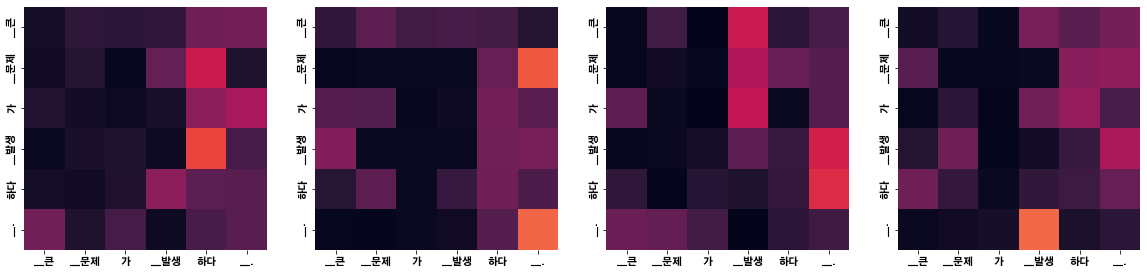

<Self Attention 2>


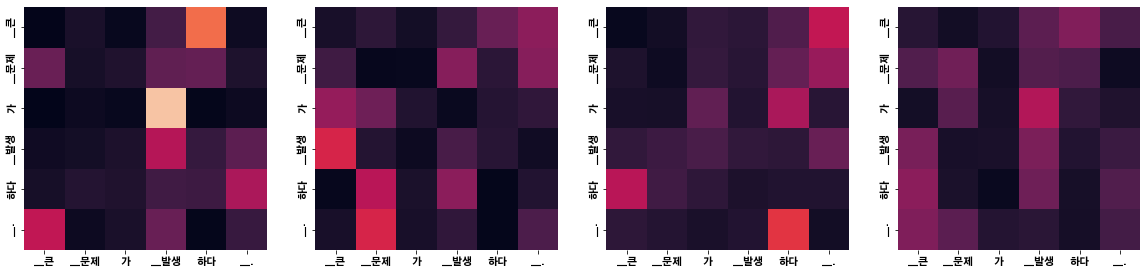

<Decoder Self Layer 1>


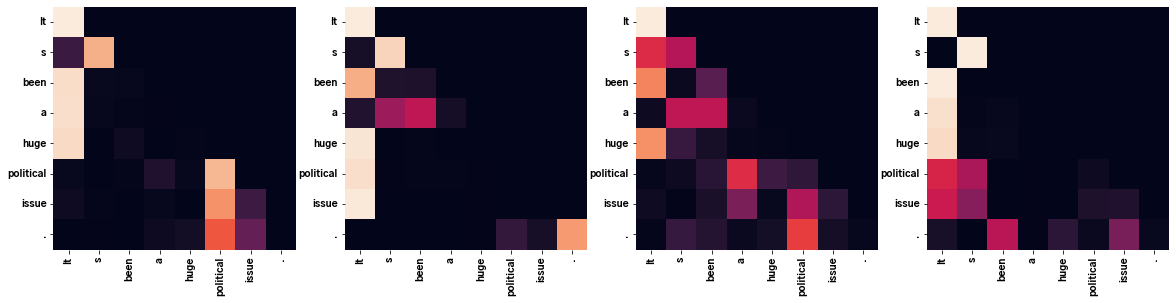

<Context Vector By Decoder Input 1>


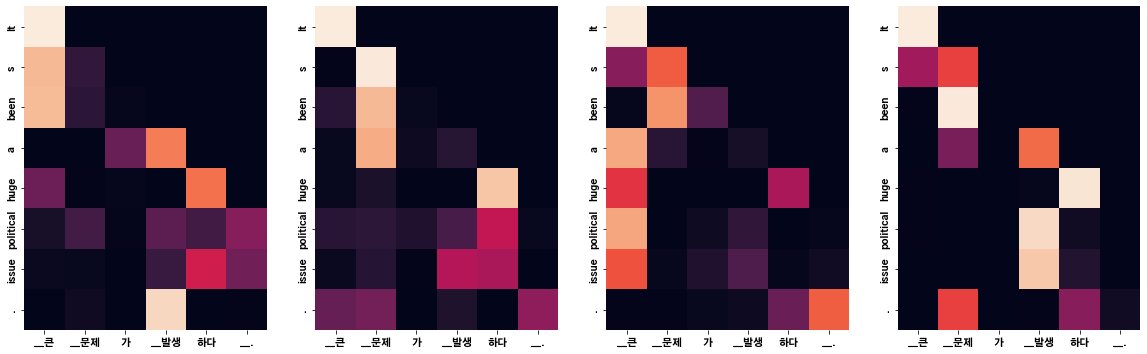

<Decoder Self Layer 2>


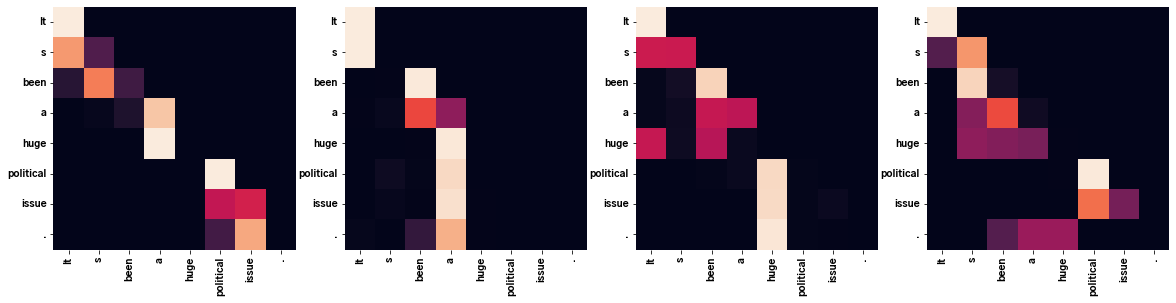

<Context Vector By Decoder Input 2>


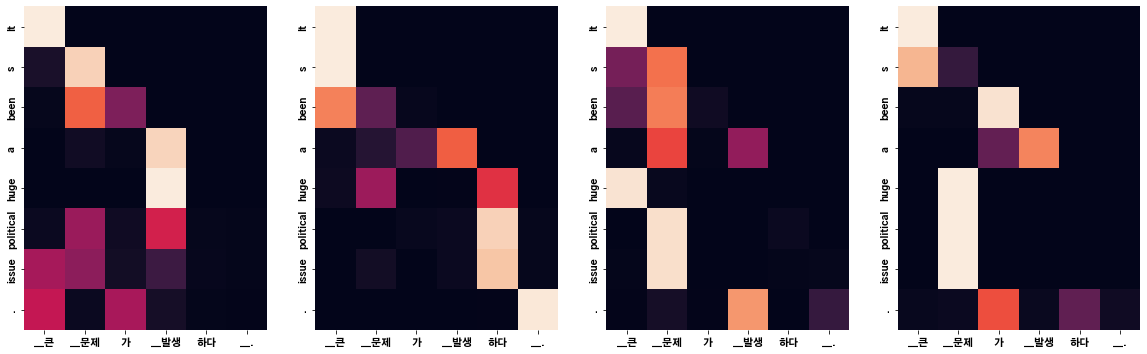

In [ ]:
fit(enc_train, dec_train, ko_tokenizer, en_tokenizer)

### **5-6. 최종 학습 결과 확인**

- **SentencePeice를 사용한 Transformer 모델의 학습 횟수 별 결과 비교** 

|**학습 횟수**|**국문**|**숫자 데이터를 미포함한 Transformer 번역 수행 영문**|**숫자 데이터를 포함한 Transformer 번역 수행 영문**|
|:---:|:---:|:---:|:---:|
|1|오바마는 대통령이다.|Obama s elected to the presidential presidential presidential candidate.|Obama is the first time.|
|5|오바마는 대통령이다.|It is a president.|**Obama is the president.**|
|10|오바마는 대통령이다.|The Oval Office is a Obama family.|**Obama is a man who s president.**|
|15|오바마는 대통령이다.|The President is a Obama present.|Obama is a place in the presidential election.|
|20|오바마는 대통령이다.|**The President is, Obama is a black president.**|Obama is President. Watch Obama s leading presidential trip|
|25|오바마는 대통령이다.|The President is, Obama is.|**Obama is a President.**|
|30|오바마는 대통령이다.|The President is in plus years.|**Obama is President elect.**|


|**학습 횟수**|**국문**|**숫자 데이터를 미포함한 Transformer 번역 수행 영문**|**숫자 데이터를 포함한 Transformer 번역 수행 영문**|
|:---:|:---:|:---:|:---:|
|1|시민들은 도시 속에 산다.|They are a little in the area.|They are a new car.|
|5|시민들은 도시 속에 산다.|citizens.|**There are a growing city.**|
|10|시민들은 도시 속에 산다.|The city s food city will only become the only one visiting.|That is down to 90.|
|15|시민들은 도시 속에 산다.|For the rest of the country is getting about urban.|We have cities down the city.|
|20|시민들은 도시 속에 산다.|The city s urban rise is onto the rise.|Some in the city of All rights.|
|25|시민들은 도시 속에 산다.|They ve decided the overseas will take every extra in the wealth.|San Francisco Oakland, New is a nice safety.|
|30|시민들은 도시 속에 산다.|The city is put to traffic.|Among the city s urban was a safety 22.|

|**학습 횟수**|**국문**|**숫자 데이터를 미포함한 Transformer 번역 수행 영문**|**숫자 데이터를 포함한 Transformer 번역 수행 영문**|
|:---:|:---:|:---:|:---:|
|1|커피는 필요 없다.|They are not going to be able to be very very very very very very very very very very ⁇|This is a lot of the new.|
|5|커피는 필요 없다.|She needs to be able to get a cup of de France.|Then there are no need.|
|10|커피는 필요 없다.|coffee makes coffee.|There s another fair.|
|15|커피는 필요 없다.|coffee . aren t drinking.|The needs to drive the drinker.|
|20|커피는 필요 없다.|coffee there is no coffee.|need to do so.|
|25|커피는 필요 없다.|coffee there is no need for ⁇|need nobody needs.|
|30|커피는 필요 없다.|coffee.|He cannot need a permanent member.|

|**학습 횟수**|**국문**|**숫자 데이터를 미포함한 Transformer 번역 수행 영문**|**숫자 데이터를 포함한 Transformer 번역 수행 영문**|
|:---:|:---:|:---:|:---:|
|1|일곱 명의 사망자가 발생했다.|The blast was killed in a nearly nearly , a hospital, who was killed.|They were killed in the town of the town.|
|5|일곱 명의 사망자가 발생했다.|Six soldiers were dead.|Seven other seven people died.|
|10|일곱 명의 사망자가 발생했다.|Seven people were killed, , of them injuries.|Seven people were killed , the local official said.|
|15|일곱 명의 사망자가 발생했다.|Seven soldiers were killed, said Monday.|**Seven people were killed by the deaths.**|
|20|일곱 명의 사망자가 발생했다.|Seven people were dead Tuesday, a toll toll media tollhind.|Seven people were killed and another seven were wounded.|
|25|일곱 명의 사망자가 발생했다.|Seven people were killed, and some said he was about killed.|Seven other seven deaths were forced to rise.|
|30|일곱 명의 사망자가 발생했다.|Seven seven people were killed.|Seven people were killed or wounded.|

처음에는 프로젝트 지시 사항에 따라 숫자 데이터를 미포함해서 진행했으나, 생각보다 좋지 않은 결과를 보여주었다. 학습이 진행됨에 따라 어느정도 맞추는 확률이 높아지는 모습을 보여야 하는데, 한두개의 키워드나 흐름 외에 전체적으로 성능이 떨어지는 모습을 보여 주었다. 혹시나 싶은 마음에 저번 프로젝트에서 진행했던 대로 정규화를 진행해서 출력을 해 본 결과, 숫자 데이터를 포함했을 경우 더 뛰어난 성능을 보여주는 것이 확인되었다. 하지만 전반적으로 저번 프로젝트에 비해 미비한 성능을 보여주어 아쉽다.

- **20회 학습 기준 - Mecab을 사용한 Seq2seq모델과 SentencePeice를 사용한 Transformer 모델 비교**

|**국문**|**Seq2seq 번역 수행 영문**|**숫자 미포함 데이터 Transformer 번역 수행 영문**|**숫자 포함 데이터 Transformer 번역 수행 영문**|
|:---:|:---:|:---:|:---:|
|오바마는 대통령이다.|obama is a former president.|The President is, Obama is a black president.|Obama is President. Watch Obama s leading presidential trip|
|시민들은 도시 속에 산다.|they are also a huge number of the city.|The city s urban rise is onto the rise.|Some in the city of All rights.|
|커피는 필요 없다.|he says.|coffee there is no coffee.|need to do so.|
|일곱 명의 사망자가 발생했다.|six were killed.|Seven people were dead Tuesday, a toll toll media tollhind.|Seven people were killed and another seven were wounded.|
|여름은 날씨가 덥다.|the summer morning , the weather is the best way to get the new weather.|The summer weather is in weather.|You weather in weather.|
|그와 그녀는 결혼을 한다.|he is married to her marriage.|She and she married in a Senate crew|She she married.|
|영화관에서 영화를 보고 싶다.|i want to play a movie in the screen.|There may be some words.|The idea sees, it s several hit the final.|
|아이들은 학교에 간다.|they were in the school.|children|The children are school.|
|동물은 동물원에 있다.|the animals are being found in the zoos.|The animals are zoos.|zoo officials are Wednesday.|
|큰 문제가 발생하다.|the problem is a major point.|Fears that too largely will also be a big problem.|It s coming toward a foreign national congress.|

전반적으로 두개의 모델을 비교해 본 결과, Mecab을 활용한 Seq2seq모델의 성능이 더 좋다는 것을 알 수 있다. 아무래도 Mecab의 경우에는 한글에 특화된 형태소 분석기이기 때문에 더 성능이 좋다고 생각해 볼 수 있을 것 같다. 이를 뒷받침하기 위해서는 Mecab을 형태소 분석기로 활용한 뒤 Transformer 모델을 사용한 결과가 필요한데, 이번에 시간이 부족해서 그 부분까지 진행하지는 못했다. SentencePiece는 영-한 둘 다 토큰화가 가능하기 때문에 범용성이 뛰어나긴 하지만, 결과 확인을 통해 한국어에 특화된 형태소 분석기의 필요성을 느낄 수 있었다.

## **6. 회고**

### **6-1. 프로젝트 회고**

이번 프로젝트에서는 오류가 많이 나지는 않았으나 오류가 계속 해결되지 않는 문제가 발생하였다.  

가장 먼저 문제였던 부분은 토큰화 부분이었는데, 계속해서 토큰화 과정에서 오류가 발생했다. 인코딩 문제, 토큰화 완료된 문장을 확인했을 때 제대로 토큰화가 진행되지 않는 문제, vocab 크기 오류 문제 등 문제도 다양했고, 해결도 잘 되지 않았다. 내가 작업을 진행했을 때에는 문제가 해결되지 않았는데, 다른 분들과 문제를 공유한 결과 크게 코드에 변화가 없었으나 문제가 해결이 되었다. 아무래도 인코딩이 가장 큰 문제였던 것 같은데, 정확한 해결 이유를 잘 모르겠다.  

두번째 문제는 아직 해결을 하지 못했는데, 왜 학습 진행 시 문장 출력 결과에 1, 50이 같이 출력이 되는지 모르겠다. 해결을 해보려고 코드를 찾아보고 많은 시도를 했지만 결국 해결하지 못해서 아쉽다.  

Transformer 모델은 모델의 구조가 복잡하고 많아서 그런지 항상 코드를 구현할 때 어렵다는 생각이 든다. 그리고 이번에는 따로 train, test 데이터로 나뉘어 있지 않다보니 early stopping을 활용하지 못하는 점이 아주 답답하다. 일부러 좋은 결과를 위해 많이 학습을 돌렸는데 오버피팅 현상이 발생했고, 오버피팅 발생 직전 가장 성능이 좋은 지점을 결정하는 부분이 어렵고 애매하게 느껴진 것 같다.  

그리고 마지막 결과에 시각화를 진행했는데, 한글 폰트를 설정했음에도 불구하고 일부 폰트 부분이 깨지는 경우가 발생했다. 이건 폰트 구성의 문제 같은데, 10,000자 이상으로 구성된 폰트로 바꿔주니 문제가 해결 되었다. 생각보다 시각화 부분에서 자잘한 오류가 많이 발생하는 것 같고, 매번 비슷한 문제가 발생하기 때문에 꼭 잘 확인하고 넘어가는 게 중요할 것 같다.  

마지막으로 학습 결과를 확인했을 때 여러번 학습을 돌려봤는데, 신기하게 돌릴 때 마다 결과가 너무 다르게 나온다. 이유는 잘 모르겠는데, 어느 경우에는 학습 횟수가 적은 경우 똑같은 글자를 길게 나열하는 경우가 있고, 또 다른 경우에는 물음표를 뱉어낸다. 무슨 기준으로 그런건지 이유가 궁금하다.

### **6-2. 참고 자료**

1. https://github.com/YAGI0423/aiffel_going_deeper_nlp/blob/main/going_deeper_10/GD10_v4_1.ipynb
2. https://github.com/eunji1/Aiffel/blob/main/NLP/NLP%5B10%5Dtransformer.ipynb